# Lost in Time and Space: The Mystery of Spaceship Titanic
<br>


<img src="images\sapceships.png" alt="Spaceship Titanic" align="left" width="900" />


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


## A Journey Beyond, A Twist of Fate

Just a month ago, the Spaceship Titanic embarked on an incredible voyage through the stars. Imagine, a grand passenger liner carrying around 13,000 people, all on their way to new homes on distant planets orbiting far-off stars.

<img src="images\alpha_centauri.jpg" alt="Spaceship Titanic" align="left" width="900" />
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

But then, as the ship rounded Alpha Centauri on its way to the fiery 55 Cancri E, something unexpected happened. Hidden within a cloud of dust, a weird space thing—a "spacetime anomaly"—was waiting. The Spaceship Titanic, oblivious to the anomaly, sailed right into it. Just like its ancient namesake from a thousand years ago, disaster struck. The ship survived, but almost half of its passengers ended up in a different dimension!

## The Puzzle I Must Solve

My task is to help the brave rescue teams. They're working hard to find and bring back the lost passengers, who are now stuck in this strange alternate dimension. How am I going to help? Well, I'll use some computer magic to predict which passengers got caught in the anomaly. I've got records from the ship's damaged computers to help me.


## The Clues in the Data

To crack this cosmic riddle, I've got some special information:

- **train.csv** - This is like a treasure trove of personal details about most of the passengers (around 8,700 of them). It's my training data. Inside, I've got things like:

    - **PassengerId** - Every passenger has a special ID, like gggg_pp. The gggg part shows which group the passenger is with, and pp is their number in the group. Sometimes groups are families, but not always.
    - **HomePlanet** - Where they lived before this space adventure began.
    - **CryoSleep** - Did they choose to take a long space nap? If they did, they stayed in their cabins.
    - **Cabin** - This is like their room number, written as deck/num/side. The side can be P (Port) or S (Starboard).
    - **Destination** - Where they were headed, planet-wise.
    - **Age** - How old they are.
    - **VIP** - Did they go all-out for VIP treatment?
    - **RoomService**, **FoodCourt**, **ShoppingMall**, **Spa**, **VRDeck** - How much they spent on cool ship stuff.
    - **Name** - First and last names, you know the drill.
    - **Transported** - This is what I'm trying to figure out. Did the anomaly zap them?

- **test.csv** - This is like the second half of the story. I've got records for the rest of the passengers (about 4,300), and I need to predict whether they got transported by the anomaly.




## My Mission

My quest isn't just about numbers and data. It's about shedding light on the fate of these lost travelers. I'm going to craft a prediction model that's really good at spotting which passengers ended up in that alternate dimension. By doing that, I'll be one step closer to solving the cosmic enigma that's now surrounding the Spaceship Titanic's once-in-a-lifetime journey.



<br>
<br>
<div style="border-top: 1px solid;"></div>

 
## Importing the necessary libraries

These libraries include tools for data manipulation (numpy, pandas), visualization (matplotlib, seaborn), preprocessing (OneHotEncoder, ColumnTransformer), and modeling (LogisticRegression, KNeighborsClassifier, etc.). These tools provide the foundation for data analysis, feature engineering, and building predictive models.

In [1]:
# Import necessary libraries for data manipulation, visualization, and modeling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import preprocessing tools for encoding categorical variables and feature scaling
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Import machine learning algorithms for classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Import tools for model evaluation and performance metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import  accuracy_score, f1_score, make_scorer

In [2]:
import warnings
warnings.filterwarnings('ignore')

<br>
<br>
<div style="border-top: 1px solid;"></div>

## Data Analysis
### Loading Data
I'm importing passenger data from "train.csv" using pandas. This step sets the stage for analysis and modeling.

In [3]:
# Loading the train data
passenger_data = pd.read_csv("spaceship-titanic-dataset/train.csv")
passenger_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
passenger_data.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


### Data Summary

I will present a concise overview of the dataset, including key statistics and information about each feature. The data summary will provide a quick understanding of the dataset.


In [5]:
# Display basic information about the data
passenger_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


The `passenger_data.info()` command provides a summary of the dataset's information and structure. It includes details about the data types of each column, the number of non-null values, and memory usage.

In [6]:
# Display summary statistics of numerical columns
passenger_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


The `passenger_data.describe()` command provides a summary of basic descriptive statistics for the numerical columns in the dataset. It includes information about the central tendency, spread, and distribution of the data.

In [7]:
# Display the names of all columns in the dataset
passenger_data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [8]:
# Calculate and display the total number of rows (data points) in the dataset
len(passenger_data)

8693

In [9]:
# Check for missing values in the dataset and display the count of missing values for each column
passenger_data.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

The `passenger_data.isna().sum()` command calculates the sum of missing values (NaN or Null values) in each column of the passenger_data dataset. This is helpful for assessing the completeness of the dataset and identifying which columns have missing data that might need to be addressed during data preprocessing.

In [10]:
# Count the number of unique values in categorical columns 

for columns in passenger_data.columns:
    if passenger_data[columns].dtype == 'object':
        print(f"{columns} unique values:{passenger_data[columns].unique()}")
        print('-'*100)
        

PassengerId unique values:['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
----------------------------------------------------------------------------------------------------
HomePlanet unique values:['Europa' 'Earth' 'Mars' nan]
----------------------------------------------------------------------------------------------------
CryoSleep unique values:[False True nan]
----------------------------------------------------------------------------------------------------
Cabin unique values:['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
----------------------------------------------------------------------------------------------------
Destination unique values:['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
----------------------------------------------------------------------------------------------------
VIP unique values:[False True nan]
----------------------------------------------------------------------------------------------------
Name unique v

Displays the unique values present in each categorical column of the passenger_data DataFrame. It provides insights into the different categories and variations within each categorical feature. 

In [11]:
# Count the occurrences of each unique value in the "Transported" column
passenger_data["Transported"].value_counts()


Transported
True     4378
False    4315
Name: count, dtype: int64

### Age Distribution Histogram
I'm visualizing the distribution of passenger ages using a histogram. The seaborn library is used to set the plot style, and a histogram plot is created with the "Age" data from the dataset. The x-axis represents age, and the y-axis represents the frequency of passengers within each age group.

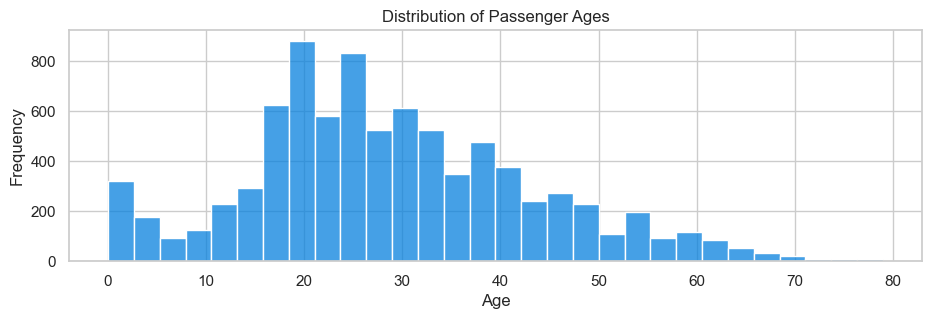

In [12]:
# Create a histogram or a KDE plot to visualize the distribution of ages among passengers.

# Set the style
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(11, 3))

# Plot the age distribution using a histogram
sns.histplot(data=passenger_data, x="Age", bins=30, color='#0781de')

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Passenger Ages");


### VIP Status and Transportation Count Plot
This cell produces a count plot to explore the relationship between VIP status and transportation by the anomaly. A crosstab of VIP status and transportation is plotted as a bar plot. The resulting plot shows the frequency of transported and not transported passengers based on their VIP status.

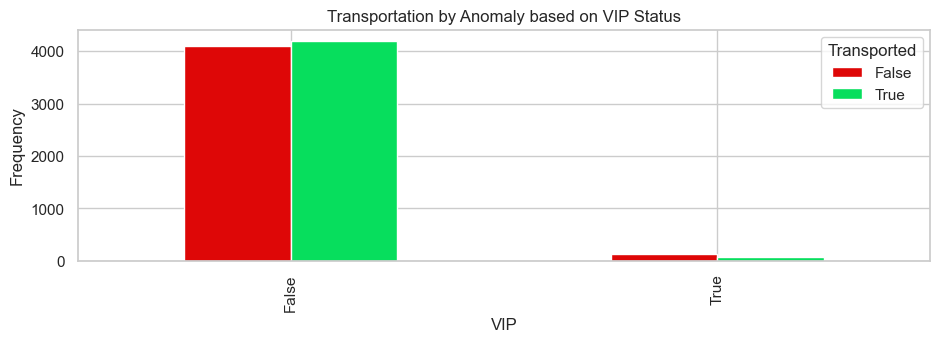

In [13]:
# Use a count plot to visualize how VIP status relates to transportation by the anomaly.

# Create a crosstab and plot it as a bar plot
pd.crosstab(passenger_data["VIP"], passenger_data["Transported"]).plot(kind="bar",
                                                                       figsize=(11, 3),
                                                                       color=["#de0707", "#07de5d"])

# Set plot title and ylabel
plt.title("Transportation by Anomaly based on VIP Status")
plt.ylabel("Frequency");

**VIP stands for Very Important Person.**  VIP passengers are those who received special treatment or privileges during their journey on the spaceship. This could include exclusive services and accommodations. Analyzing the impact of VIP status on transportation outcomes helps us understand if this special treatment affected passengers' chances of successful transportation.

### Distribution of Categorical Variables
Here, I'm creating bar plots to visualize the distribution of passengers' home planets, cryo-sleep status, and destinations. Each categorical variable is plotted in a separate subplot. The color-coded bars show the count of passengers associated with each category for each variable.

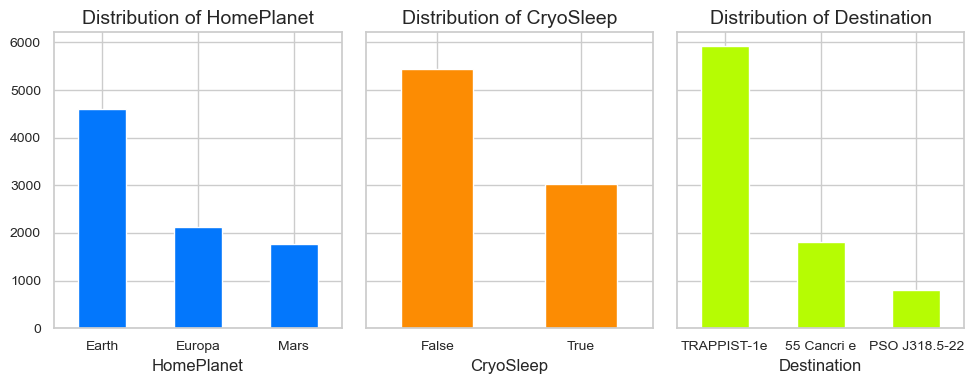

In [14]:
# Create bar plots  for categorical variables 

# List of object columns
object_columns = ["HomePlanet", "CryoSleep", "Destination"]
colors = ['#0377fc', '#fc8c03', '#b6fc03']

# Set up the figure and subplots with shared y-axis
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4), sharey=True )

# Create subplots for each categorical variable
for ax, column, color in zip(axes.flatten(), object_columns, colors):
    value_counts = passenger_data[column].value_counts()
    value_counts.plot(kind="bar", ax=ax, color=color)
    ax.set_title(f'Distribution of {column}', fontsize=14)
    ax.tick_params(axis='x', rotation=0, labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

# Adjust layout and spacing between subplots
plt.tight_layout()


  *  **HomePlanet:** This feature refers to the planet of origin for each passenger. It provides information about where passengers are from before embarking on the spaceship.

  *  **CryoSleep:** CryoSleep indicates whether a passenger underwent cryogenic sleep during the journey. Cryogenic sleep involves freezing passengers and preserving their bodies during space travel.

  *  **Destination:** Destination represents the intended final location or planet that each passenger was heading to on the spaceship journey.

### Correlation Heatmap of Numeric Variables
A heatmap is generated to display the correlation between numeric variables. The seaborn library is used to create a heatmap of the correlation matrix for numeric features. Each cell in the heatmap represents the correlation coefficient between two variables, and the color intensity indicates the strength of the correlation.

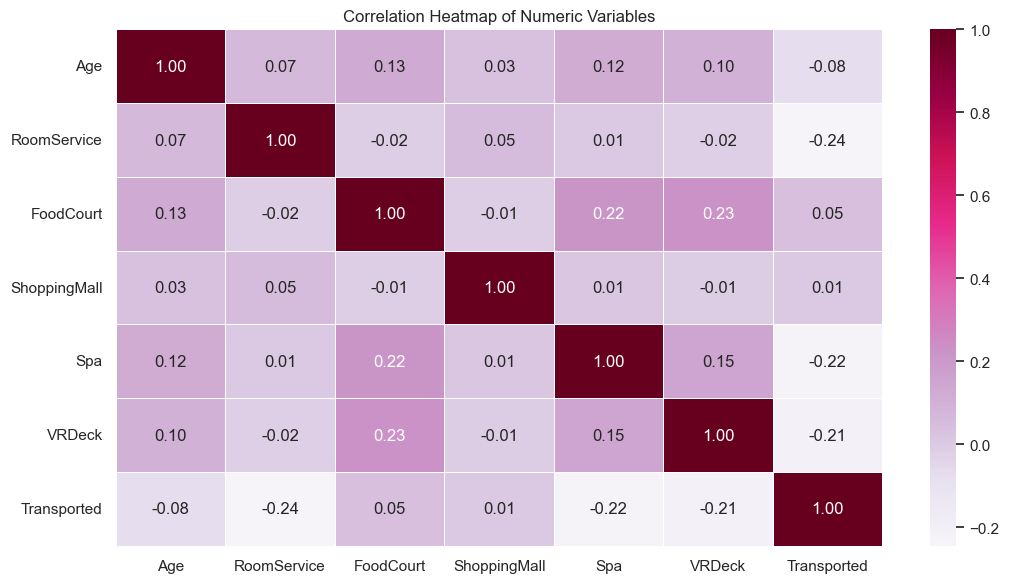

In [15]:
# Calculate the correlation matrix for numeric columns
correlation_matrix = passenger_data.corr(numeric_only=True)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(11, 6))

# Create a heatmap with annotations and the custom purple color map
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="PuRd", ax=ax)

# Set the title of the heatmap
ax.set_title("Correlation Heatmap of Numeric Variables")

# Tighten the layout
plt.tight_layout()



   * **If the correlation coefficient is close to 1**, it indicates a strong positive correlation, meaning that as one variable increases, the other variable tends to increase as well.

   * **If the correlation coefficient is close to -1**, it indicates a strong negative correlation, meaning that as one variable increases, the other variable tends to decrease.

   * **If the correlation coefficient is close to 0**, it indicates a weak or no linear correlation between the variables.


### Feature Correlation with Transportation Bar Plots
Here, I'm comparing the mean values of numeric features for transported and not transported passengers. The code calculates the mean of each numeric feature separately for both categories and displays them as side-by-side bar plots. This provides insight into how these features might correlate with transportation status.

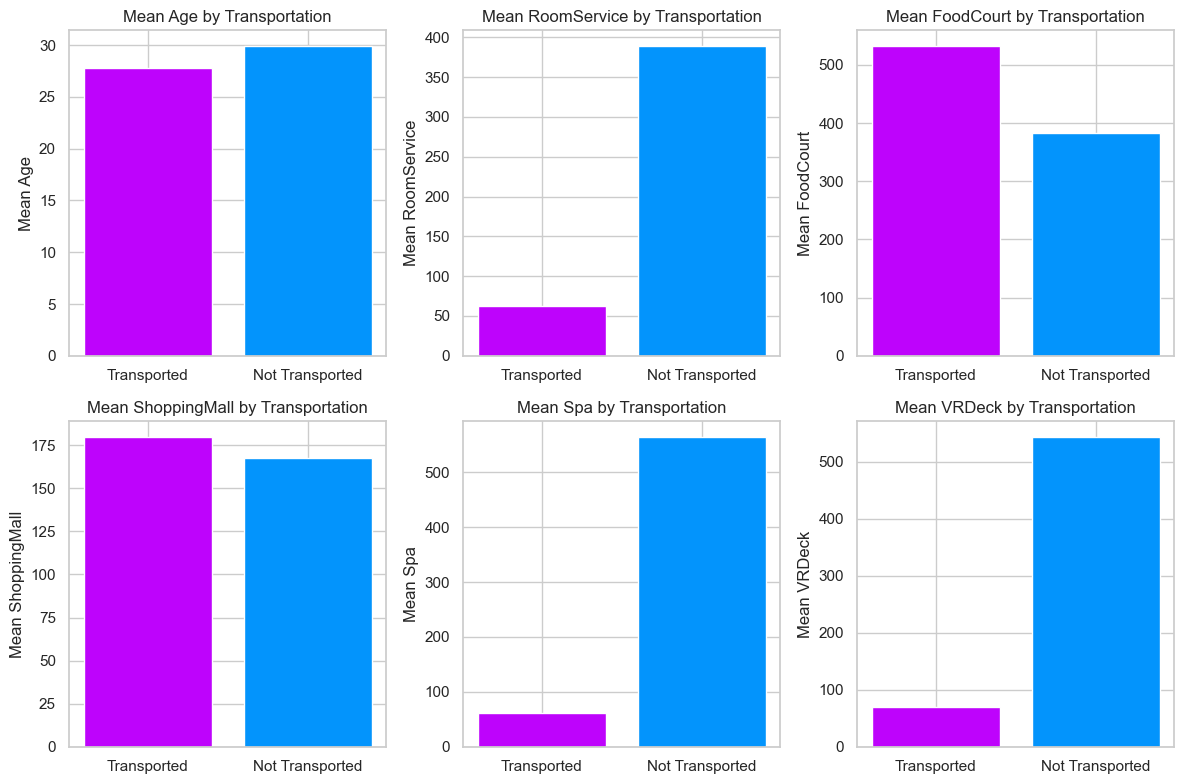

In [16]:
# Feature Correlation with Transportation

# Select Numeric Features
numeric_features = passenger_data.select_dtypes(include="float64")


# Create separate dataframes for transported and not transported passengers
transported_passengers = passenger_data[passenger_data["Transported"] == 1]
not_transported_passengers = passenger_data[passenger_data["Transported"] == 0]

# Create side-by-side bar plots for each numeric feature
plt.figure(figsize=(12, 8))

for idx, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, idx)
    
    # Bar Plot
    # Calculate mean values for transported and not transported passengers
    mean_transported = transported_passengers[feature].mean()
    mean_not_transported = not_transported_passengers[feature].mean()
    plt.bar(["Transported", "Not Transported"], [mean_transported, mean_not_transported], color=["#be03fc", "#0394fc"])
    
    # Set plot title and labels
    plt.title(f"Mean {feature} by Transportation")
    plt.ylabel(f"Mean {feature}")

# Adjust layout and show plots
plt.tight_layout()



 *   **Age:** This column represents the age of each passenger. It provides information about the age distribution of the passengers on the spaceship.

  *  **RoomService:** RoomService indicates the amount of spending a passenger made on room service amenities during the journey. It reflects how much passengers engaged in or utilized room services.

  *  **FoodCourt:** FoodCourt column represents the spending of passengers on food court services. It indicates the extent to which passengers made use of the food court facilities.

  *  **Spa:** The Spa column signifies the amount of spending a passenger made on spa services during the journey. It shows how many passengers availed themselves of spa amenities.

  *  **VRDeck:** VRDeck represents the spending of passengers on the virtual reality deck. It indicates the level of interest in and usage of virtual reality experiences.

  *  **ShoppingMall:** This column reflects passengers' spending on shopping mall services. It shows the extent to which passengers engaged in shopping activities.

### Scatter Plots of Age vs. Spending on Amenities
Scatter plots are created to visualize the relationships between passengers' ages and their spending on different ship amenities. This code provides insight into how passengers' ages relate to their spending on different ship amenities and how this relationship differs based on transportation status.

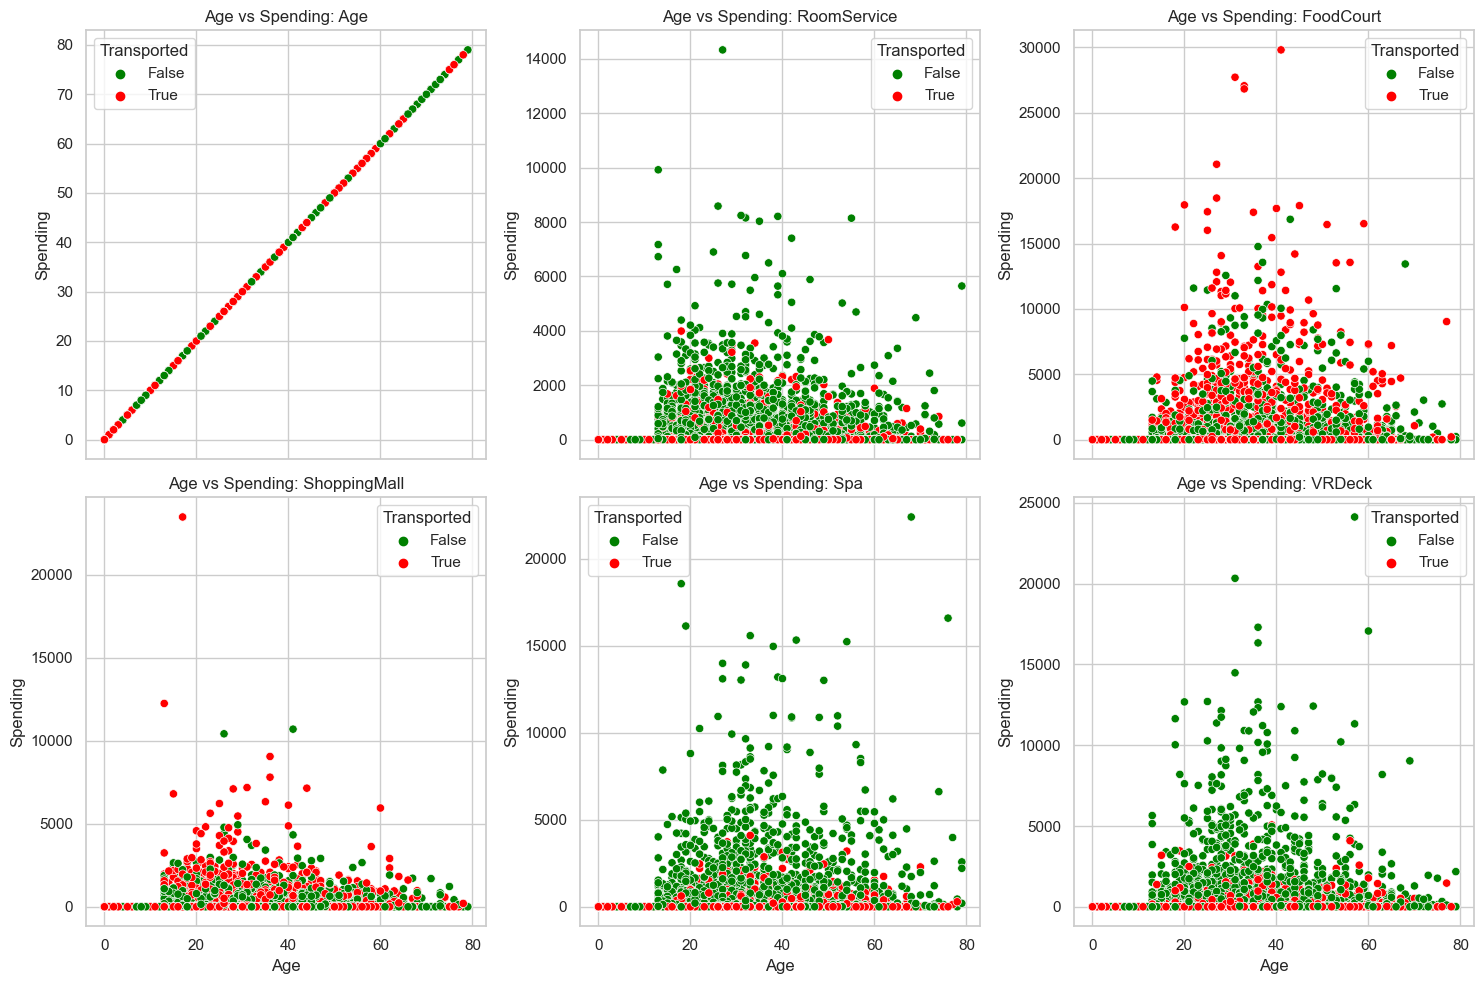

In [17]:

# Create subplots for scatter plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10),  sharex=True)

for ax, column in zip(axes.flatten(), numeric_features):
    # Create scatter plots
    sns.scatterplot(data=passenger_data, x="Age", y=column, hue="Transported", ax=ax, palette=["green","red"])
    ax.set_title(f"Age vs Spending: {column}")
    ax.set_xlabel("Age")
    ax.set_ylabel("Spending")

# Step 4: Adjust layout
plt.tight_layout()


### Bar Plot of Passengers' Destinations by Transportation

This code cell generates a bar plot that illustrates the distribution of passengers' destinations based on their transportation status. The plot helps to visualize the distribution of passengers across different home planets and how their transportation status relates to their destinations.

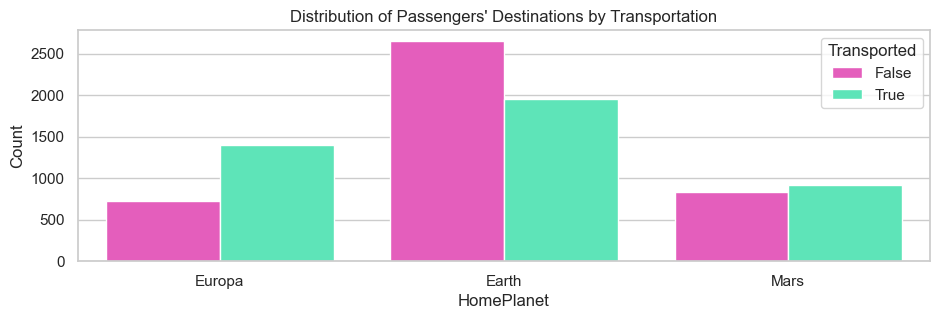

In [18]:
# Create a bar plot
plt.figure(figsize=(11, 3))
sns.countplot(data=passenger_data, x="HomePlanet", hue="Transported", palette=["#fa48c5", "#48fabf"])
plt.title("Distribution of Passengers' Destinations by Transportation")
plt.ylabel("Count");

### Make a copy

In [19]:
# Create a copy of the original passenger_data DataFrame for preprocessing
passenger_data_copy = passenger_data.copy()

<br>
<br>
<div style="border-top: 1px solid;"></div>

## Data Preprocessing






### Handling Missing Values

Dealing with missing values is crucial for ensuring accurate analysis and modeling. In this section, I'll walk through the steps taken to handle missing values in the dataset and I'm going to create a function to do this.


#### The `fill_missing_values` Function

1. **Handling Numeric Columns:** For numeric columns, missing values are replaced with the mean of the respective column. This strategy helps maintain the overall statistical properties of the data and minimizes the impact on the distribution.

2. **Handling Categorical Columns:** For non-numeric columns, which often represent categorical variables, missing values are filled with the label "missing." This approach retains information about the absence of data in categorical features without introducing any assumptions.


In [20]:
# Create a function that fill the missing valuees

def fill_missing_values(df):
    """
    Fill missing values in a DataFrame.

    Parameters:
        df (DataFrame): The input DataFrame containing missing values.

    Returns:
        DataFrame: The DataFrame with missing values filled.
    """
   # Create a copy of the original DataFrame
    df_filled = df.copy()

    # Loop through each column (label) and its content in the DataFrame
    for label, content in df_filled.items():
        # Check if the column contains numeric values
        if pd.api.types.is_numeric_dtype(content):
            # Check if there are missing values in the column
            if pd.isnull(content).sum():
                # Create a new binary column indicating missing values
                df_filled[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with the median of the column
                df_filled[label] = content.fillna(content.median())
        else:
            # Create a new binary column indicating missing values
            df_filled[label+"_is_missing"] = pd.isnull(content)
            # Fill missing non-numeric values with the string "missing"
            df_filled[label] = content.fillna("missing")

    return df_filled

In [21]:
# Fill missing values in the passenger_data DataFrame using the fill_missing_values function
filled_data = fill_missing_values(passenger_data_copy)


#### Before filling:

In [22]:
# Review the missing values in each columns
passenger_data_copy.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

#### After filling:

In [23]:
# Review the updated count of missing values in each column
filled_data.isna().sum()

PassengerId                0
HomePlanet                 0
CryoSleep                  0
Cabin                      0
Destination                0
Age                        0
VIP                        0
RoomService                0
FoodCourt                  0
ShoppingMall               0
Spa                        0
VRDeck                     0
Name                       0
Transported                0
PassengerId_is_missing     0
HomePlanet_is_missing      0
CryoSleep_is_missing       0
Cabin_is_missing           0
Destination_is_missing     0
Age_is_missing             0
VIP_is_missing             0
RoomService_is_missing     0
FoodCourt_is_missing       0
ShoppingMall_is_missing    0
Spa_is_missing             0
VRDeck_is_missing          0
Name_is_missing            0
dtype: int64

In [24]:
filled_data.isna().sum()

PassengerId                0
HomePlanet                 0
CryoSleep                  0
Cabin                      0
Destination                0
Age                        0
VIP                        0
RoomService                0
FoodCourt                  0
ShoppingMall               0
Spa                        0
VRDeck                     0
Name                       0
Transported                0
PassengerId_is_missing     0
HomePlanet_is_missing      0
CryoSleep_is_missing       0
Cabin_is_missing           0
Destination_is_missing     0
Age_is_missing             0
VIP_is_missing             0
RoomService_is_missing     0
FoodCourt_is_missing       0
ShoppingMall_is_missing    0
Spa_is_missing             0
VRDeck_is_missing          0
Name_is_missing            0
dtype: int64

### Encoding Categorical Variables

To encode categorical variables, I'll create a function.
#### The `encode_categorical_features` Function

  1.  Converts object-type boolean columns into native boolean format.
  2.  Targets categorical features by identifying columns with non-numeric data types.
  3.  Employs a ColumnTransformer along with an alternative encoding technique for categorical features.
  4.  Transforms the data using the modified transformer and returns the transformed DataFrame.


In [25]:
# Create a function that encode the categorical variables

def encode_categorical_features(df):
    
    """
    Encode categorical features using a modified approach.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data to be encoded.
    
    Returns:
    pandas.DataFrame: The DataFrame with encoded categorical features.
    """
    df_cat = df.copy()
    
    if "Transported" in df_cat.columns:
        df_cat.drop("Transported", axis=1)  
    for label, content in df_cat.items():
        # Handling non-numeric columns
        if not pd.api.types.is_numeric_dtype(content):
            # Create a new binary column to indicate missing values in the non-numeric column
            df_cat[label+"_is_missing"] = pd.isnull(content)
            # Convert non-numeric data into categorical codes (integers)
            df_cat[label] = pd.Categorical(content).codes + 1

    return df_cat

In [26]:
# Encode the categorical varibles using the function above
transformed_data = encode_categorical_features(filled_data)

#### Before transforming:

In [27]:
passenger_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


#### After transforming:

In [28]:
transformed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PassengerId              8693 non-null   int16  
 1   HomePlanet               8693 non-null   int8   
 2   CryoSleep                8693 non-null   int8   
 3   Cabin                    8693 non-null   int16  
 4   Destination              8693 non-null   int8   
 5   Age                      8693 non-null   float64
 6   VIP                      8693 non-null   int8   
 7   RoomService              8693 non-null   float64
 8   FoodCourt                8693 non-null   float64
 9   ShoppingMall             8693 non-null   float64
 10  Spa                      8693 non-null   float64
 11  VRDeck                   8693 non-null   float64
 12  Name                     8693 non-null   int16  
 13  Transported              8693 non-null   bool   
 14  PassengerId_is_missing  

### Feature Scaling

Feature scaling is an essential preprocessing step when working with machine learning algorithms that are sensitive to the scale of input features. In this section, I'll walk you through the process of feature scaling and how it helps enhance the performance of our models.


#### The `feature_scaler` Function

To achieve feature scaling, I've created a function called `feature_scaler`. This function applies the Min-Max Scaling technique to scale numerical features. Min-Max Scaling transforms each feature to a new range based on the minimum and maximum values, preserving the relationships between values.
le.

In [29]:
# Create a function that scales features

def feature_scaler(data):
    """
    Scale the numerical features in the DataFrame using Min-Max Scaler.
    Replaces the original numerical columns with scaled values.
    """
    # Initialize the Min-Max scaler
    min_max_scaler = MinMaxScaler()
    
    # Select numerical features
    numerical_features = data.select_dtypes(include='float64')
    
    # Scale the numerical features
    scaled_numerical = min_max_scaler.fit_transform(numerical_features)
    
    # Create a DataFrame with scaled numerical values
    scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_features.columns)
    
    # Replace the original numerical columns with scaled values
    data[numerical_features.columns] = scaled_numerical_df
    
    return data



In [30]:
# Call the function to scale the features in passenger_data
passenger_data_scaled = feature_scaler(transformed_data)

**Before scalling:**

In [31]:
passenger_data.select_dtypes(include='float64')

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,18.0,0.0,0.0,0.0,0.0,0.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0


**After scalling:**

In [32]:
passenger_data_scaled.select_dtypes(include='float64')

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.303797,0.007608,0.000302,0.001064,0.024500,0.001823
2,0.734177,0.003001,0.119948,0.000000,0.299670,0.002030
3,0.417722,0.000000,0.043035,0.015793,0.148563,0.007997
4,0.202532,0.021149,0.002348,0.006428,0.025214,0.000083
...,...,...,...,...,...,...
8688,0.518987,0.000000,0.228726,0.000000,0.073322,0.003066
8689,0.227848,0.000000,0.000000,0.000000,0.000000,0.000000
8690,0.329114,0.000000,0.000000,0.079687,0.000045,0.000000
8691,0.405063,0.000000,0.035186,0.000000,0.015753,0.134049


### Data Splitting

Before modeling, I'll split the data into training, validation, and possibly testing sets. This ensures we have separate data for each phase.

In [33]:
# Split the data into X & y

X = passenger_data_scaled.drop("Transported", axis=1)
y = passenger_data_scaled["Transported"]

X.shape, y.shape

((8693, 26), (8693,))

In [34]:
np.random.seed(42)

# Split into train & test set
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)

In [35]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1739 entries, 304 to 6093
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PassengerId              1739 non-null   int16  
 1   HomePlanet               1739 non-null   int8   
 2   CryoSleep                1739 non-null   int8   
 3   Cabin                    1739 non-null   int16  
 4   Destination              1739 non-null   int8   
 5   Age                      1739 non-null   float64
 6   VIP                      1739 non-null   int8   
 7   RoomService              1739 non-null   float64
 8   FoodCourt                1739 non-null   float64
 9   ShoppingMall             1739 non-null   float64
 10  Spa                      1739 non-null   float64
 11  VRDeck                   1739 non-null   float64
 12  Name                     1739 non-null   int16  
 13  PassengerId_is_missing   1739 non-null   bool   
 14  HomePlanet_is_missing    17

In [36]:
X_train.shape, X_val.shape

((6954, 26), (1739, 26))

In [37]:
y_train.shape, y_val.shape

((6954,), (1739,))

<br>
<br>
<div style="border-top: 1px solid;"></div>

## Modeling
### Evaluate and Train Model
 I will assess how well the initial model performs after training. I'll use metrics to measure its performance. If needed, I will adjust the model's parameters and train it again to improve its accuracy. 
 
 
 I'm going to try 3 diffirent machine learning models:

   1. **Logistic Regression:**  Logistic Regression is a classification algorithm that estimates the probability of a binary outcome based on input features using a logistic function.
   2. **Support Vector Machine (SVM):** SVM is a classification algorithm that finds the optimal hyperplane in a high-dimensional space to separate different classes. It aims to maximize the margin between the classes, and it can handle both linear and non-linear classification tasks.
   3. **Random Forest Classifier:** The Random Forest Classifier is an ensemble learning method that builds multiple decision tree models during training and combines their predictions to enhance accuracy and reduce overfitting.
  

In [51]:
# Define base models for evaluation
base_models = {
    "LR": LogisticRegression(),
    "SVM": SVC(),  
    "RF": RandomForestClassifier()
}

The `fit_metrics_model` function:

   * Trains multiple models using training data.
   * Makes predictions on validation data.
   * Calculates metrics (accuracy, precision, recall, F1-score) for each model.
   * Returns metrics in a DataFrame.

In [52]:
def fit_metrics_model(models, X_val, y_val):
    """
    Fit multiple models and evaluate their performance using various metrics.

    Parameters:
        models (dict): A dictionary where keys are model names and values are model instances.
        X_val (array-like): Validation data features.
        y_val (array-like): Validation data labels.

    Returns:
        pandas.DataFrame: A DataFrame containing evaluation metrics for each model.
    """
    metrics = {}
    
    for name, model in models.items():
        # Fit the model on the training data
        model.fit(X_train, y_train)
        print(f"Training {name} model")
        # Make predictions on the validation data
        y_preds = model.predict(X_val)
        
        # Calculate evaluation metrics
        metrics[name] = {
            "Accuracy": accuracy_score(y_val, y_preds),
            "Precision": precision_score(y_val, y_preds),
            "Recall": recall_score(y_val, y_preds),
            "F1-Score": f1_score(y_val, y_preds)
        }
        


    return pd.DataFrame(metrics).T


In [53]:
models_evaluation = fit_metrics_model(base_models, X_val, y_val)

Training LR model
Training SVM model
Training RF model


In [54]:
models_evaluation

,Accuracy,Precision,Recall,F1-Score
LR,0.703278,0.729114,0.656036,0.690647
SVM,0.572168,0.606688,0.433941,0.505976
RF,0.785509,0.793946,0.776765,0.785262


### Visualizing Model Comparison

I will visualize the comparison of the models' performance using a bar chart. Each bar represents a model, and different evaluation metrics are represented using distinct colors.

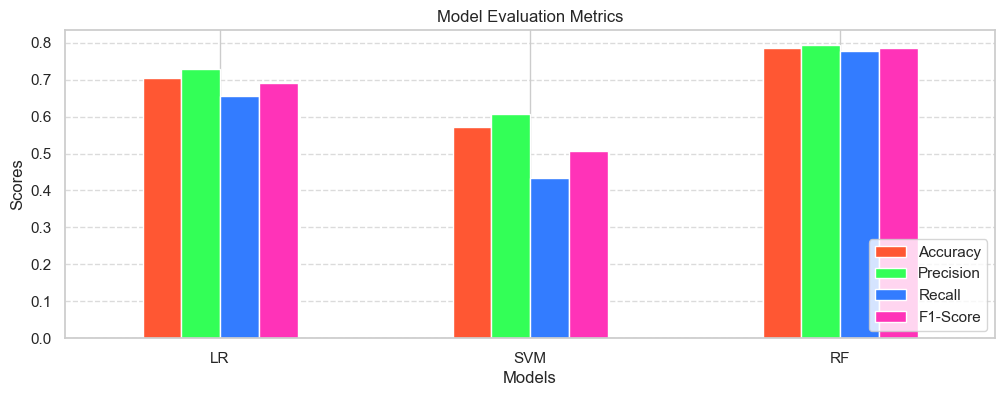

In [55]:
# Plot the bar chart with improved styling
ax = models_evaluation.plot(kind="bar", figsize=(12, 4), color=['#FF5733', '#33FF57', '#337CFF', '#FF33B8'])

# Add labels and title
plt.xlabel("Models")
plt.ylabel("Scores")
plt.title("Model Evaluation Metrics")

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the legend
plt.legend(loc='lower right')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=0);

Based on the evaluation results, the Random Forest Classifier stands out with the highest accuracy, precision, recall, and F1-score among the compared models. This suggests that the Random Forest model excels in accurately predicting the target classes, maintaining a balanced trade-off between precision and recall. Its ensemble nature, robustness to overfitting, and feature importance analysis make it a compelling choice for this task. While Logistic Regression offers interpretability, the Random Forest's superior performance makes it the preferred model in this scenario.


### Hyperparameter Optimization

I will now perform hyperparameter optimization to fine-tune the model's settings and improve its performance. The RandomizedSearchCV technique is used to explore different combinations of hyperparameters.

The following hyperparameters will be explored:

  *  **Penalty type (penalty):** Regularization method to prevent overfitting: L1, L2, elastic net, or none.
  *  **Regularization strength (C):** Inverse of regularization strength; smaller values increase regularization.
  *  **Fit intercept (fit_intercept):** Include intercept in model equation (True/False).
  *  **Solver (solver):** Optimization algorithm for model training: newton-cg, lbfgs, liblinear, sag, saga.
  *  **Max iterations (max_iter):** Maximum training iterations for convergence (100 to 1000).
  *  **Random state (random_state):** Fixed seed for reproducibility.

In [56]:
# Define the grid of hyperparameters to search
param_dist = {
    'n_estimators': np.array([400, 500, 600]),
    'max_depth': np.array([15, 20, 25]),
    'min_samples_split': np.array([2, 3, 4]),
    'min_samples_leaf': np.array([3, 4, 5]),
    'max_features': np.array(['auto', 'sqrt', 'log2']),
    'bootstrap': np.array([True]),
    'random_state': np.array([42])
}


In [60]:
%%time
# Create a Random Forest Classifier model
rf_model = RandomForestClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the randomized search to the data
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: total: 6.88 s
Wall time: 6min 19s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': array([ True]),
                                        'max_depth': array([15, 20, 25]),
                                        'max_features': array(['auto', 'sqrt', 'log2'], dtype='<U4'),
                                        'min_samples_leaf': array([3, 4, 5]),
                                        'min_samples_split': array([2, 3, 4]),
                                        'n_estimators': array([400, 500, 600]),
                                        'random_state': array([42])},
                   random_state=42, scoring='accuracy', verbose=2)

In [61]:
# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'random_state': 42, 'n_estimators': 400, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': True}
Best Score: 0.8018423679460458


The best parameters are used to create the ideal logistic regression model:

In [62]:
# Get the best parameters for Logistic Regression
best_params = random_search.best_params_

# Create a Logistic Regression model with the best parameters
ideal_model = RandomForestClassifier(**best_params)

### Model Evaluation with Cross-Validation

I'm going to assess the performance of my ideal logistic regression model and a baseline logistic regression model using cross-validation. Cross-validation helps I understand how well my model will generalize to new, unseen data.

The `cross_validation` function::

   * Evaluates a given model's performance using cross-validation.
   * Splits the data into training and testing subsets multiple times (folds).
   * Calculates metrics like accuracy, precision, recall, and F1-score for each fold.
   * Computes the average of these metrics across all folds.
   * Provides average metrics to assess the model's performance.
   * Facilitates model comparison and decision-making for new, unseen data.

In [63]:
def cross_validation(clf, X, y, cv):
    """
    Perform cross-validation and calculate evaluation metrics.
    
    Parameters:
        clf (estimator): The classifier or model to be evaluated.
        X (array-like): The feature matrix.
        y (array-like): The target vector.
        cv (int or cross-validation generator): Determines the cross-validation splitting strategy.
        scoring_metrics (list): A list of scoring metrics to be used for evaluation.
        
    Returns:
        list: Mean values of the specified evaluation metrics from cross-validation.
    """
    
    # Calculate evaluation metrics using cross-validation
    accuracy = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
    precision = cross_val_score(clf, X, y, cv=cv, scoring='precision_macro')
    recall = cross_val_score(clf, X, y, cv=cv, scoring='recall_macro')
    f1 = cross_val_score(clf, X, y, cv=cv, scoring='f1_macro')
    
    
    mean_accuracy = np.mean(accuracy)
    mean_precision = np.mean(precision)
    mean_recall = np.mean(recall)
    mean_f1 = np.mean(f1)
    
    return [mean_accuracy, mean_precision, mean_recall, mean_f1]

Using cross-validation, I'll evaluate both the improved model (with optimized hyperparameters) and the baseline model (regular RandomForest ). For each model, I'll calculate the mean values of the evaluation metrics across different folds of the data.

Let's see how the models perform using these metrics.

In [84]:
# Create a list of metric names for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']


# Create lists of mean values for both models
improved_model_means = cross_validation(ideal_model, cv=5, X=X, y=y)
baseline_model_means = cross_validation(RandomForestClassifier(), cv=5, X=X, y=y)

# Create a DataFrame to compare models
compare_model = pd.DataFrame(index=metrics)
compare_model["improved_model"] = improved_model_means
compare_model["baseline_model"] = baseline_model_means

compare_model


,improved_model,baseline_model
Accuracy,0.758776,0.724495
Precision,0.793626,0.784764
Recall,0.759540,0.722214
F1-Score,0.750490,0.690795


The resulting compare_model DataFrame displays the mean values of various metrics for both models. It helps us compare their performance across different evaluation metrics. Additionally, I've added a bar plot to visually represent the metric comparison.

### Comparison of Evaluation Metrics

To visually compare the performance of the improved model and the baseline model, I'm creating a bar plot that displays their evaluation metrics side by side.


In [ ]:
# Plotting the comparison of metrics
ax = compare_model.plot(kind="bar", color=['#377efa', '#fad937'], figsize=(11, 3))

# Adding labels and title
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Comparison of Metrics: Improved Model vs. Baseline Model')
plt.tick_params(axis='x', rotation=0, labelsize=10)

# Moving the legend to the bottom left
plt.legend(loc='lower right');


### Feature Importance - Random Forest Classifier
To prepare the data for plotting, I'm creating a DataFrame called `coef_df` to store the coefficients of each feature and their corresponding class columns.


In [66]:
# fit the ideal model
ideal_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=4,
                       min_samples_split=4, n_estimators=400, random_state=42)

In [67]:
# Get the column names (feature names)
feature_names = X_train.columns

# Match coef's of features to columns
feature_dict = dict(zip(X_train.columns, list(ideal_model.feature_importances_)))

# Create a DataFrame to hold the coefficients and feature names
coef_df = pd.DataFrame(feature_dict, columns=feature_names, index=["Feature"])

# Transpose the DataFrame to have features as rows
coef_df = coef_df.T
coef_df

,Feature
PassengerId,0.051299
HomePlanet,0.047283
CryoSleep,0.149972
Cabin,0.095712
Destination,0.015103
Age,0.054065
VIP,0.002038
RoomService,0.113468
FoodCourt,0.095144
ShoppingMall,0.080995



To gain insights into the importance of different features in the logistic regression model, I'm creating a bar chart that displays the coefficients of each feature for different classes.


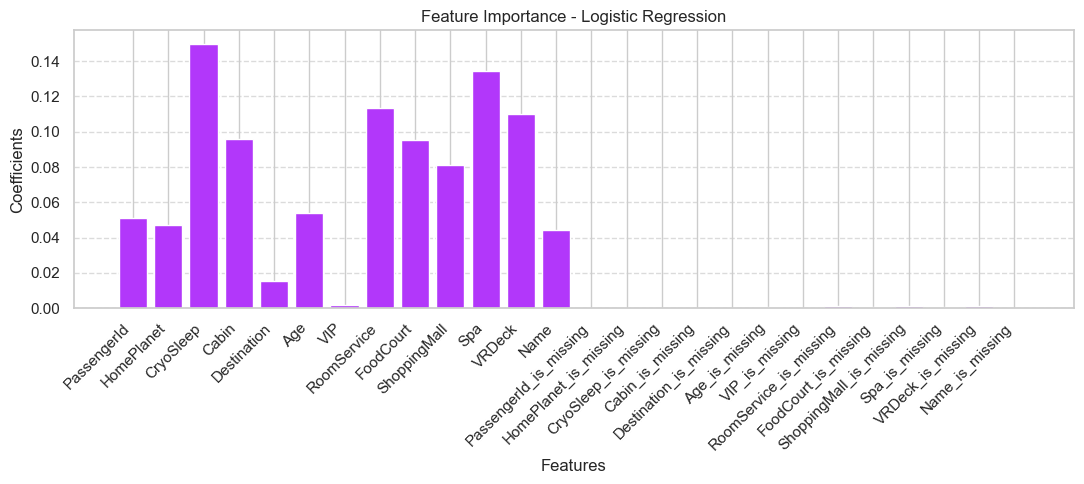

In [68]:
# Rename the columns to the class names (e.g., Class 0, Class 1, Class 2)
class_names = [f"Class {i}" for i in range(len(coef_df.columns))]
coef_df.columns = class_names

# Plot the bar chart with custom styles
plt.figure(figsize=(11, 5))


# Plot the bars for each class with different colors
for idx, class_name in enumerate(class_names):
    plt.bar(coef_df.index, coef_df[class_name], label=class_name, color='#b237fa')

# Add labels, title, and legend
plt.xlabel("Features")
plt.ylabel("Coefficients")
plt.title("Feature Importance - Logistic Regression")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout();

## Predicting Passenger Transportation Status

I will guide you through the process of preparing data and predicting whether passengers are "Transported" on the spaceship's journey. My goal is to use the trained ideal model to predict whether a passenger will be transported to their intended destination.

### Loading and Exploring the Test Data
1. **Data Loading:** I start by loading the details of these passengers from the "test.csv" file.

2. **Preparation:** I preprocess the data, addressing missing values and converting categorical features for accurate predictions.

3. **Feature Scaling:** To ensure consistent predictions, I scale the features appropriately.

4. **Prediction:** Leveraging the trained `ideal_model`, I predict the transported status for each remaining passenger.

5. **Result Creation:** I compile these predictions into a DataFrame named `result_df`.

6. **Display:** I present the initial predictions, providing an overview.


In [69]:
# Load the test data into the passenger_data_test DataFrame
passenger_data_test = pd.read_csv("spaceship-titanic-dataset/test.csv")
passenger_data_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [70]:
# Display information about the data types and missing values in the passenger_data_test DataFrame
passenger_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [71]:
# Get the shape of the passenger_data_test DataFrame
passenger_data_test.shape

(4277, 13)

In [72]:
# Display the count of missing values in each column of the passenger_data DataFrame
passenger_data.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [73]:
# Fill missing values in the passenger_data_test DataFrame using the fill_missing_values function
filled_data = fill_missing_values(passenger_data_test)
filled_data.isna().sum()

PassengerId                0
HomePlanet                 0
CryoSleep                  0
Cabin                      0
Destination                0
Age                        0
VIP                        0
RoomService                0
FoodCourt                  0
ShoppingMall               0
Spa                        0
VRDeck                     0
Name                       0
PassengerId_is_missing     0
HomePlanet_is_missing      0
CryoSleep_is_missing       0
Cabin_is_missing           0
Destination_is_missing     0
Age_is_missing             0
VIP_is_missing             0
RoomService_is_missing     0
FoodCourt_is_missing       0
ShoppingMall_is_missing    0
Spa_is_missing             0
VRDeck_is_missing          0
Name_is_missing            0
dtype: int64

In [74]:

# Encode categorical features in the filled_data DataFrame using the encode_categorical_features function
trainformed_data = encode_categorical_features(filled_data)
trainformed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PassengerId              4277 non-null   int16  
 1   HomePlanet               4277 non-null   int8   
 2   CryoSleep                4277 non-null   int8   
 3   Cabin                    4277 non-null   int16  
 4   Destination              4277 non-null   int8   
 5   Age                      4277 non-null   float64
 6   VIP                      4277 non-null   int8   
 7   RoomService              4277 non-null   float64
 8   FoodCourt                4277 non-null   float64
 9   ShoppingMall             4277 non-null   float64
 10  Spa                      4277 non-null   float64
 11  VRDeck                   4277 non-null   float64
 12  Name                     4277 non-null   int16  
 13  PassengerId_is_missing   4277 non-null   bool   
 14  HomePlanet_is_missing   

In [75]:
# Scale the features in the trainformed_data DataFrame using the feature_scaler function
scaled_data = feature_scaler(trainformed_data)
scaled_data.select_dtypes(include=["number"]).head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,1,1,2,2785,3,0.341772,1,0.000000,0.000000,0.00000,0.000000,0.000000,2913
1,2,1,1,1868,3,0.240506,1,0.000000,0.000356,0.00000,0.142260,0.000000,2407
2,3,2,2,258,1,0.392405,1,0.000000,0.000000,0.00000,0.000000,0.000000,3377
3,4,2,1,260,3,0.481013,1,0.000000,0.263206,0.00000,0.009121,0.026266,2712
4,5,1,1,1941,3,0.253165,1,0.000865,0.000000,0.07658,0.000000,0.000000,669


### Making Predictions for Lost Passengers

Now, I'm using the model I trained earlier to guess what happened to the missing passengers. I'm giving the model the information I have about these passengers, and it's giving me its best guess about whether they were transported or not. This helps me fill in the missing parts of the story and imagine what might have happened to them during the journey.

In [76]:
X.shape, y.shape

((8693, 26), (8693,))

In [77]:
# Predict transported status using the ideal_model on the scaled_data
transported_preds = ideal_model.predict(scaled_data)

In [78]:
# Create a DataFrame to hold the results
result_df  = pd.DataFrame()

# Extract PassengerId from passenger_data_test and add it to the DataFrame
result_df ["PassengerId"] = np.array(passenger_data_test["PassengerId"])

# Add the predictions of transported status to the DataFrame
result_df ["Transported"] = transported_preds

# Display the first few rows of the resulting DataFrame
result_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [79]:
result_df["Transported"].value_counts()

Transported
True     2447
False    1830
Name: count, dtype: int64

In [83]:
# Save the result to a csv file
result_df.to_csv("spaceship-titanic-dataset/cosmic_predictions.csv", index=False)